In [2]:
# imports

import pandas as pd
import os
import numpy as np
import matplotlib as plt

from scipy import signal
# import librosa

import scipy.io
from matplotlib import pyplot as plt
from scipy.signal import hilbert, firls, butter, sosfilt, filtfilt, sosfreqz, stft

from numpy import zeros, ceil, floor, absolute, linspace
from numpy.fft import fft, ifft

from scipy.stats import entropy


import matplotlib.pyplot as plt
# plt.rcParams['figure.figsize'] = [10, 5]
plt.rcParams['figure.dpi'] = 50

# Set option to display all columns
pd.set_option('display.max_columns', None)

In [1]:
# Example nested dictionaries
dict1 = {'a': {'key1': 'value1'}}
dict2 = {'b': {'key2': 'value2'}}
dict3 = {'c': {'key3': 'value3'}}

# Merging dictionaries
merged_dict = {}  # Initialize an empty dictionary
merged_dict.update(dict1)
merged_dict.update(dict2)
merged_dict.update(dict3)

print(merged_dict)


{'a': {'key1': 'value1'}, 'b': {'key2': 'value2'}, 'c': {'key3': 'value3'}}


In [3]:
# from datasets import load_dataset
# tiny_dataset = load_dataset('CamWheeler135/MLP_EEG_Tiny_Dataset')

In [4]:
from huggingface_hub import HfApi

API = HfApi()

# data = np.load(file_path)

dataset = API.snapshot_download(repo_id='CamWheeler135/MLP_EEG_Tiny_Dataset', local_dir = './dataset_cache', repo_type='dataset')

/Users/chaeeunlee/anaconda3/envs/hms/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Fetching 3647 files: 100%|██████████| 3647/3647 [00:02<00:00, 1526.88it/s]


In [5]:
type(dataset)

str

In [6]:
import numpy as np

saved_dataset_path = '/Users/chaeeunlee/Documents/VSC_workspaces/huggingface_home_cache/hub/datasets--CamWheeler135--MLP_EEG_Tiny_Dataset/snapshots/dc80109f595930b7eb9e3770ca9fe01b8e9081bf/train/training_data/butter_bandpass/' # 6824934.npy'

# loaded_data = np.load(saved_dataset_path)

In [7]:
filenames = [f for f in os.listdir(saved_dataset_path) if os.path.isfile(os.path.join(saved_dataset_path, f))]
print(filenames)

filenames = [filename.split('.')[0] for filename in filenames]
print(filenames)

['1202419561.npy', '296645751.npy', '1977035544.npy', '503026991.npy', '373742867.npy', '2775627565.npy', '1517534885.npy', '75383995.npy', '1827528945.npy', '3245265750.npy', '489438348.npy', '3986643690.npy', '1385834314.npy', '3700683928.npy', '514728480.npy', '387298188.npy', '2578300086.npy', '1083202612.npy', '1817224319.npy', '2860882461.npy', '581835046.npy', '2455170677.npy', '1540941819.npy', '2466411078.npy', '32470083.npy', '851484723.npy', '879991078.npy', '1374377199.npy', '926407057.npy', '3440942430.npy', '1686420732.npy', '77111565.npy', '2235687783.npy', '1623262527.npy', '3980303044.npy', '3924681333.npy', '4274063487.npy', '781578921.npy', '2844742535.npy', '906031605.npy', '975997189.npy', '1292897779.npy', '165064454.npy', '3130369170.npy', '665897184.npy', '1050669058.npy', '4201675613.npy', '2813446198.npy', '2815559450.npy', '4132543185.npy', '985283217.npy', '3830912663.npy', '69974678.npy', '2428425786.npy', '2290818215.npy', '203706383.npy', '3865994961.npy'

In [8]:
# loaded_data.shape # 6824934

NameError: name 'loaded_data' is not defined

In [9]:
# type(train_csv.label_id.unique())

label_ids = list(train_csv.label_id.unique())

label_id=6824934

assert 6824934 in label_ids

train_csv[train_csv.label_id==label_id].gpd_vote

NameError: name 'train_csv' is not defined

In [10]:
# local imports -> name the functions lol bad practice. 

from eda_utils import *
from filt_utils import *
from spectrogram_utils import *

In [11]:
# change this to local dataset directory
project_dir = '/Users/chaeeunlee/Documents/VSC_workspaces/kaggle_hms_eeg_private/hms-harmful-brain-activity-classification/'
train_csv = pd.read_csv(os.path.join(project_dir, f'train.csv'))

In [ ]:
type(train_csv.filter(like='_vote'))

pandas.core.frame.DataFrame

In [12]:
# Calculate total votes across all vote columns
total_votes = train_csv.filter(like='_vote').sum(axis=1)
print(f"train_csv.shape = {train_csv.shape}, total_votes.shape = {total_votes.shape}")

# Iterate through columns and calculate probabilities for vote columns
for column in train_csv.columns:
    if column.endswith('_vote'):
        prob_column_name = column.replace('_vote', '_prob')  
        train_csv[prob_column_name] = train_csv[column] / total_votes

train_csv['total_votes'] = total_votes

display(train_csv.head())

print(f"train_csv.total_votes.unique() = {train_csv.total_votes.unique()}") # hmm diff number of annotators for each row. 
# train_csv.seizure_prob.unique()



train_csv.shape = (106800, 15), total_votes.shape = (106800,)


eeg_id  eeg_sub_id  eeg_label_offset_seconds  spectrogram_id  \
0  1628180742           0                       0.0          353733   
1  1628180742           1                       6.0          353733   
2  1628180742           2                       8.0          353733   
3  1628180742           3                      18.0          353733   
4  1628180742           4                      24.0          353733   

   spectrogram_sub_id  spectrogram_label_offset_seconds    label_id  \
0                   0                               0.0   127492639   
1                   1                               6.0  3887563113   
2                   2                               8.0  1142670488   
3                   3                              18.0  2718991173   
4                   4                              24.0  3080632009   

   patient_id expert_consensus  seizure_vote  lpd_vote  gpd_vote  lrda_vote  \
0       42516          Seizure             3         0         0          0   
1       42516          Seizure             3         0         0          0   
2       42516          Seizure             3         0         0          0   
3       42516          Seizure             3         0         0          0   
4       42516          Seizure             3         0         0          0   

   grda_vote  other_vote  seizure_prob  lpd_prob  gpd_prob  lrda_prob  \
0          0           0           1.0       0.0       0.0        0.0   
1          0           0           1.0       0.0       0.0        0.0   
2          0           0           1.0       0.0       0.0        0.0   
3          0           0           1.0       0.0       0.0        0.0   
4          0           0           1.0       0.0       0.0        0.0   

   grda_prob  other_prob  total_votes  
0        0.0         0.0            3  
1        0.0         0.0            3  
2        0.0         0.0            3  
3        0.0         0.0            3  
4        0.0         0.0            3

train_csv.total_votes.unique() = [ 3 11 16  5 14  4  1 13 12 17 15  2 10  6 20 18 19 21 27 24 28 22 26 25
 23  7]


In [17]:
int(train_csv[train_csv.label_id==127492639]['spectrogram_id'])

/var/folders/p2/7q53dr694xv9rh09wc907xm80000gn/T/ipykernel_43602/2140217917.py:1: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  int(train_csv[train_csv.label_id==127492639]['spectrogram_id'])


353733

In [ ]:

def calculate_standard_deviation(probabilities):
    """Calculate the standard deviation of the given probabilities."""
    return np.std(probabilities)

def calculate_entropy(probabilities):
    """Calculate the entropy of the given probabilities."""
    return entropy(probabilities, base=2)

def calculate_range(probabilities):
    """Calculate the range of the given probabilities."""
    return max(probabilities) - min(probabilities)

def calculate_coefficient_of_variation(probabilities):
    """Calculate the coefficient of variation of the given probabilities."""
    mean = np.mean(probabilities)
    std_dev = np.std(probabilities)
    return std_dev / mean if mean != 0 else 0

vote_columns = train_csv.filter(like='_vote')

# Calculate metrics for each row
train_csv['std_deviation'] = vote_columns.apply(lambda row: calculate_standard_deviation(row), axis=1)
train_csv['entropy'] = vote_columns.apply(lambda row: calculate_entropy(row), axis=1)
train_csv['range'] = vote_columns.apply(lambda row: calculate_range(row), axis=1)
train_csv['coeff_variation'] = vote_columns.apply(lambda row: calculate_coefficient_of_variation(row), axis=1)


train_csv['norm_range'] = train_csv['range'] / total_votes

uncertanty_metrics = ['std_deviation', 'entropy', 'range', 'norm_range', 'coeff_variation']
# uncertanty_key = uncertanty_metrics[0]
# print(f"uncertanty_key = {uncertanty_key}")


display(train_csv.head())


eeg_id  eeg_sub_id  eeg_label_offset_seconds  spectrogram_id  \
0  1628180742           0                       0.0          353733   
1  1628180742           1                       6.0          353733   
2  1628180742           2                       8.0          353733   
3  1628180742           3                      18.0          353733   
4  1628180742           4                      24.0          353733   

   spectrogram_sub_id  spectrogram_label_offset_seconds    label_id  \
0                   0                               0.0   127492639   
1                   1                               6.0  3887563113   
2                   2                               8.0  1142670488   
3                   3                              18.0  2718991173   
4                   4                              24.0  3080632009   

   patient_id expert_consensus  seizure_vote  lpd_vote  gpd_vote  lrda_vote  \
0       42516          Seizure             3         0         0          0   
1       42516          Seizure             3         0         0          0   
2       42516          Seizure             3         0         0          0   
3       42516          Seizure             3         0         0          0   
4       42516          Seizure             3         0         0          0   

   grda_vote  other_vote  seizure_prob  lpd_prob  gpd_prob  lrda_prob  \
0          0           0           1.0       0.0       0.0        0.0   
1          0           0           1.0       0.0       0.0        0.0   
2          0           0           1.0       0.0       0.0        0.0   
3          0           0           1.0       0.0       0.0        0.0   
4          0           0           1.0       0.0       0.0        0.0   

   grda_prob  other_prob  total_votes  std_deviation  entropy  range  \
0        0.0         0.0            3       1.355262      1.0      3   
1        0.0         0.0            3       1.355262      1.0      3   
2        0.0         0.0            3       1.355262      1.0      3   
3        0.0         0.0            3       1.355262      1.0      3   
4        0.0         0.0            3       1.355262      1.0      3   

   coeff_variation  norm_range  
0         1.581139         1.0  
1         1.581139         1.0  
2         1.581139         1.0  
3         1.581139         1.0  
4         1.581139         1.0

In [ ]:
train_csv.expert_consensus.unique() # no NaN

array(['Seizure', 'GPD', 'LRDA', 'Other', 'GRDA', 'LPD'], dtype=object)

In [ ]:

# std_deviation says sth. highest in Other and lowest in Seizure. 
for uncertanty_key in uncertanty_metrics:
    print(f"uncertanty_key = {uncertanty_key}")
    grouped = train_csv.groupby('expert_consensus')[uncertanty_key].sum()
    print(grouped)

uncertanty_key = std_deviation
expert_consensus
GPD        64140.319973
GRDA       45060.534008
LPD        49900.705851
LRDA       43525.953672
Other      69752.821090
Seizure    31396.963122
Name: std_deviation, dtype: float64
uncertanty_key = entropy
expert_consensus
GPD        23760.480282
GRDA       22828.388396
LPD        20164.783149
LRDA       23118.662219
Other      24537.036211
Seizure    22393.595316
Name: entropy, dtype: float64
uncertanty_key = range
expert_consensus
GPD        167642
GRDA       114484
LPD        127673
LRDA       116662
Other      175522
Seizure     72785
Name: range, dtype: int64
uncertanty_key = norm_range
expert_consensus
GPD        16700.671329
GRDA       18859.473611
LPD        14853.530594
LRDA       16638.598214
Other      18806.300073
Seizure    20933.000000
Name: norm_range, dtype: float64
uncertanty_key = coeff_variation
expert_consensus
GPD        22740.608888
GRDA       27747.528848
LPD        20740.666030
LRDA       22856.956948
Other      268

In [ ]:
# grouped = train_csv.groupby('expert_consensus')['norm_range'].sum()
# print(grouped)

In [ ]:
print(train_csv.range.unique()) # probs not the best formula?

[ 3 11 16  5 14  4  1 13 12 17 15  2 10  6 20 18 19 21 27 24 28 22 26 25
 23  7]


In [ ]:
# stop here

In [ ]:
# def get_amplitude_range(eeg_column):
#     '''
#     assuming 'normalization' step is implied in referencing. 
#     '''

#     range = eeg_column.max() - eeg_column.min()

#     return range


# # starting from train_csv, go to corresponding eeg_id, get range of eeg amplitude, and add as column

# num_sampled = 100_000 # 30 mins to compute
# # train_csv_sampled = train_csv
# train_csv_sampled = train_csv.sample(n=num_sampled, random_state=42)

# # Initialize new columns in train_csv_sampled to store the results
# train_csv_sampled['max_col_name'] = None
# train_csv_sampled['max_range_value'] = None

# for index, row in train_csv_sampled.iterrows():
#     eeg_id = row['eeg_id']
#     eeg_sample = os.path.join(project_dir, f'train_eegs/{eeg_id}.parquet')
#     eeg_sample_df = pd.read_parquet(eeg_sample, engine='pyarrow')

#     # 0. Handle NaNs
#     eeg_sample_df = handle_nans(eeg_sample_df)
    
#     # 1. Apply Referencing 
#     referenced_eeg_df = apply_referencing(eeg_sample_df, mode='bdb_montage')

#     ranges = {}
#     for col_name in referenced_eeg_df.columns:
#         ranges[col_name] = get_amplitude_range(referenced_eeg_df[col_name])

#     # Find the column name with the maximum range and get the maximum range value
#     max_col_name = max(ranges, key=ranges.get)
#     max_range_value = ranges[max_col_name]

#     # Update the corresponding row in train_csv_sampled with these values
#     train_csv_sampled.at[index, 'max_col_name'] = max_col_name
#     train_csv_sampled.at[index, 'max_range_value'] = max_range_value

# # Optional: Print or save train_csv_sampled to verify the results
# print(train_csv_sampled.head())

In [ ]:
# ## note that we're saving on private repo!!

# all_saved_path = os.path.join(project_dir, "saved")

# filename = "train_csv_sampled_100_000"

# # Save as CSV
# csv_file_path = os.path.join(all_saved_path, f'{filename}.csv')
# parquet_file_path = os.path.join(all_saved_path, f'{filename}.parquet')

# # Check if the directory exists, and if not, create it
# if not os.path.exists(all_saved_path):
#     os.makedirs(all_saved_path)


# train_csv_sampled.to_csv(csv_file_path, index=False)
# train_csv_sampled.to_parquet(parquet_file_path, index=False)

# print(f"Data has been saved as CSV: {csv_file_path}")
# print(f"Data has been saved as Parquet: {parquet_file_path}")


In [ ]:
csv_file_path = '/Users/chaeeunlee/Documents/VSC_workspaces/kaggle_hms_eeg_private/hms-harmful-brain-activity-classification/saved/train_csv_sampled_100_000.csv'

train_csv_sampled = pd.read_csv(csv_file_path)
display(train_csv_sampled.head())

eeg_id  eeg_sub_id  eeg_label_offset_seconds  spectrogram_id  \
0   352705021          30                     108.0       686402130   
1  1758542393           5                      18.0       959372535   
2   369158057           8                      44.0       250501602   
3  1840011277           1                       4.0      1872858502   
4  2793291056           7                      34.0      1540613004   

   spectrogram_sub_id  spectrogram_label_offset_seconds    label_id  \
0                  30                             108.0   393891559   
1                   5                              18.0  4283252794   
2                   8                              44.0  3818240317   
3                   1                               4.0  1305534833   
4                   7                              34.0   106820417   

   patient_id expert_consensus  seizure_vote  lpd_vote  gpd_vote  lrda_vote  \
0       38549              GPD             0         2        11          0   
1       34893             GRDA             0         0         0          0   
2       65203          Seizure             3         0         0          0   
3       45528              LPD             0         3         0          0   
4       55692          Seizure             3         0         0          0   

   grda_vote  other_vote  seizure_prob  lpd_prob  gpd_prob  lrda_prob  \
0          0           0           0.0  0.153846  0.846154        0.0   
1          3           0           0.0  0.000000  0.000000        0.0   
2          0           0           1.0  0.000000  0.000000        0.0   
3          0           2           0.0  0.600000  0.000000        0.0   
4          0           0           1.0  0.000000  0.000000        0.0   

   grda_prob  other_prob  total_votes  std_deviation   entropy  range  \
0        0.0         0.0           13       5.310752  1.309691     13   
1        1.0         0.0            3       1.355262  1.000000      3   
2        0.0         0.0            3       1.355262  1.000000      3   
3        0.0         0.4            5       1.840586  1.485475      5   
4        0.0         0.0            3       1.355262  1.000000      3   

   coeff_variation  norm_range max_col_name  max_range_value range_bracket_log  
0         1.429818         1.0     Fp1 - F7       644.889984     301.41-716.58  
1         1.581139         1.0     Fp1 - F7       122.650002      53.33-126.78  
2         1.581139         1.0     Fp1 - F7      6576.559937   4050.23-9629.15  
3         1.288410         1.0      T6 - O2       768.280029    716.58-1703.61  
4         1.581139         1.0      C3 - P3      8035.239990   4050.23-9629.15

In [ ]:
# display(train_csv_sampled.head())

print(train_csv_sampled.max_range_value.max()) # 53925.62890625
print(train_csv_sampled.max_range_value.min()) # 122.6500015258789

## n = 30
# 53925.62890625
# 122.6500015258789

## n = 1000 (took 15 secs to compute)
# 112234.296875
# 46.880001068115234

129393.69140625
0.0


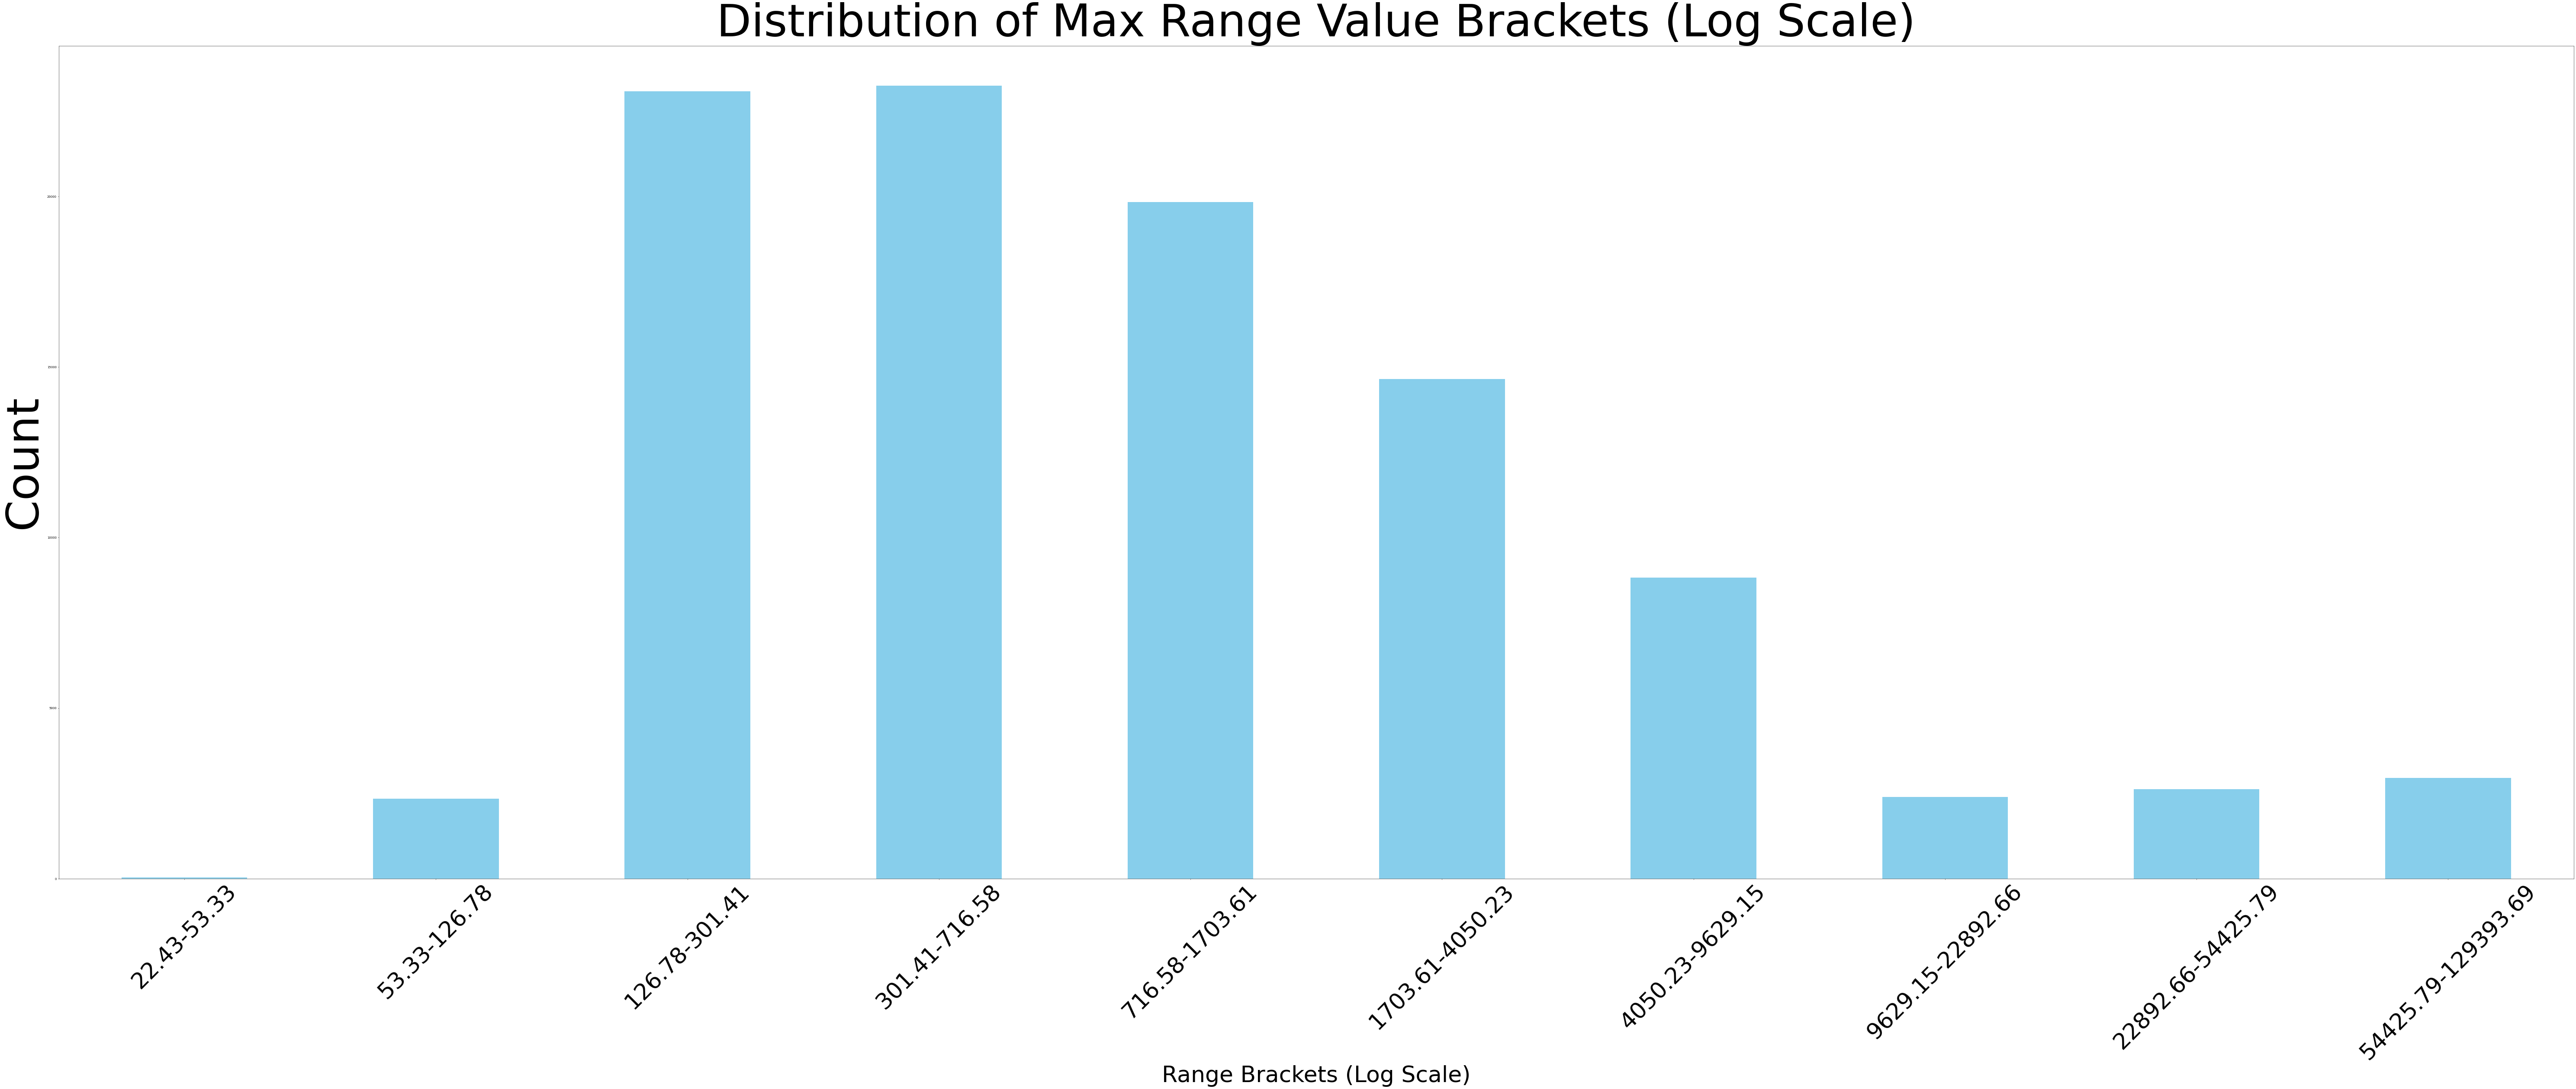

In [ ]:

# Ensure there are no non-positive values in 'max_range_value'
min_positive_value = train_csv_sampled[train_csv_sampled['max_range_value'] > 0]['max_range_value'].min()
max_value = train_csv_sampled['max_range_value'].max()

# Define bins on a log scale from the smallest positive value to the maximum value
number_of_bins = 10  # Adjust the number of bins as needed
bins = np.logspace(np.log10(min_positive_value), np.log10(max_value), number_of_bins + 1)

# Bracketize 'max_range_value' using pd.cut() and log scale bins
train_csv_sampled['range_bracket_log'] = pd.cut(train_csv_sampled['max_range_value'], bins=bins, include_lowest=True, labels=[f"{bins[i]:.2f}-{bins[i+1]:.2f}" for i in range(len(bins)-1)])

# Plot in Bar Chart
# Get the count of each bracket on log scale
bracket_counts_log = train_csv_sampled['range_bracket_log'].value_counts().sort_index()

figsize_x = 150
plt.figure(figsize=(figsize_x, figsize_x // 3))

# Plotting
bracket_counts_log.plot(kind='bar', color='skyblue')

plt.xlabel('Range Brackets (Log Scale)', fontsize=figsize_x // 2)  # Set the x-axis label
plt.ylabel('Count', fontsize=figsize_x)  # Set the y-axis label
plt.title('Distribution of Max Range Value Brackets (Log Scale)', fontsize=figsize_x)  # Set the title of the chart
plt.xticks(rotation=45, fontsize=figsize_x // 2)  # Rotate x-axis labels for better readability

plt.show()


In [ ]:
# bins[0] # 46.88000106811524
# len(bins) # 11 

threshold = 100000
num_rows = (train_csv_sampled['max_range_value'] > threshold).sum()
print(f"num_rows in train_csv_sampled (num_rows = 100_000) with threshold {threshold} = {num_rows}")

# now from this we should be able to fetch EEG images and see which bracket starts to look very funky. 




num_rows in train_csv_sampled (num_rows = 100_000) with threshold 100000 = 363


In [ ]:
# Filter rows where 'max_range_value' is greater than the threshold
filtered_df = train_csv_sampled[train_csv_sampled['max_range_value'] > threshold]

# threshold_inverse = 500
# filtered_df = train_csv_sampled[train_csv_sampled['max_range_value'] < threshold_inverse]

In [ ]:
# display(filtered_df.head())

In [ ]:
filtered_df=filtered_df[:5]
print(filtered_df.shape)

selected_eeg_ids = filtered_df['eeg_id']
selected_label_ids = filtered_df['label_id']
selected_vote_stds = filtered_df['std_deviation']
selected_consensuses = filtered_df['expert_consensus']


# threshold_identifier = f"amp_range_above_{threshold}"
# filter_identifier = "no_filter"
# dir_name = f"eeg_plots/{threshold_identifier}/{filter_identifier}/"  # Replace with your desired directory path

# file_name = f"eeg_id{selected_eeg_id}_label_id_{selected_label_id}_vote_std_{}_consensus_{}"
# # f"your_file_name.txt" 
# save_file_name = os.path.join(project_dir, dir_name, f"")



(5, 30)


Columns: ['P4 - O2', 'C4 - P4', 'F4 - C4', 'Fp2 - F4', 'T6 - O2', 'T4 - T6', 'F8 - T4', 'Fp2 - F8', 'P3 - O1', 'C3 - P3', 'F3 - C3', 'Fp1 - F3', 'T5 - O1', 'T3 - T5', 'F7 - T3', 'Fp1 - F7']


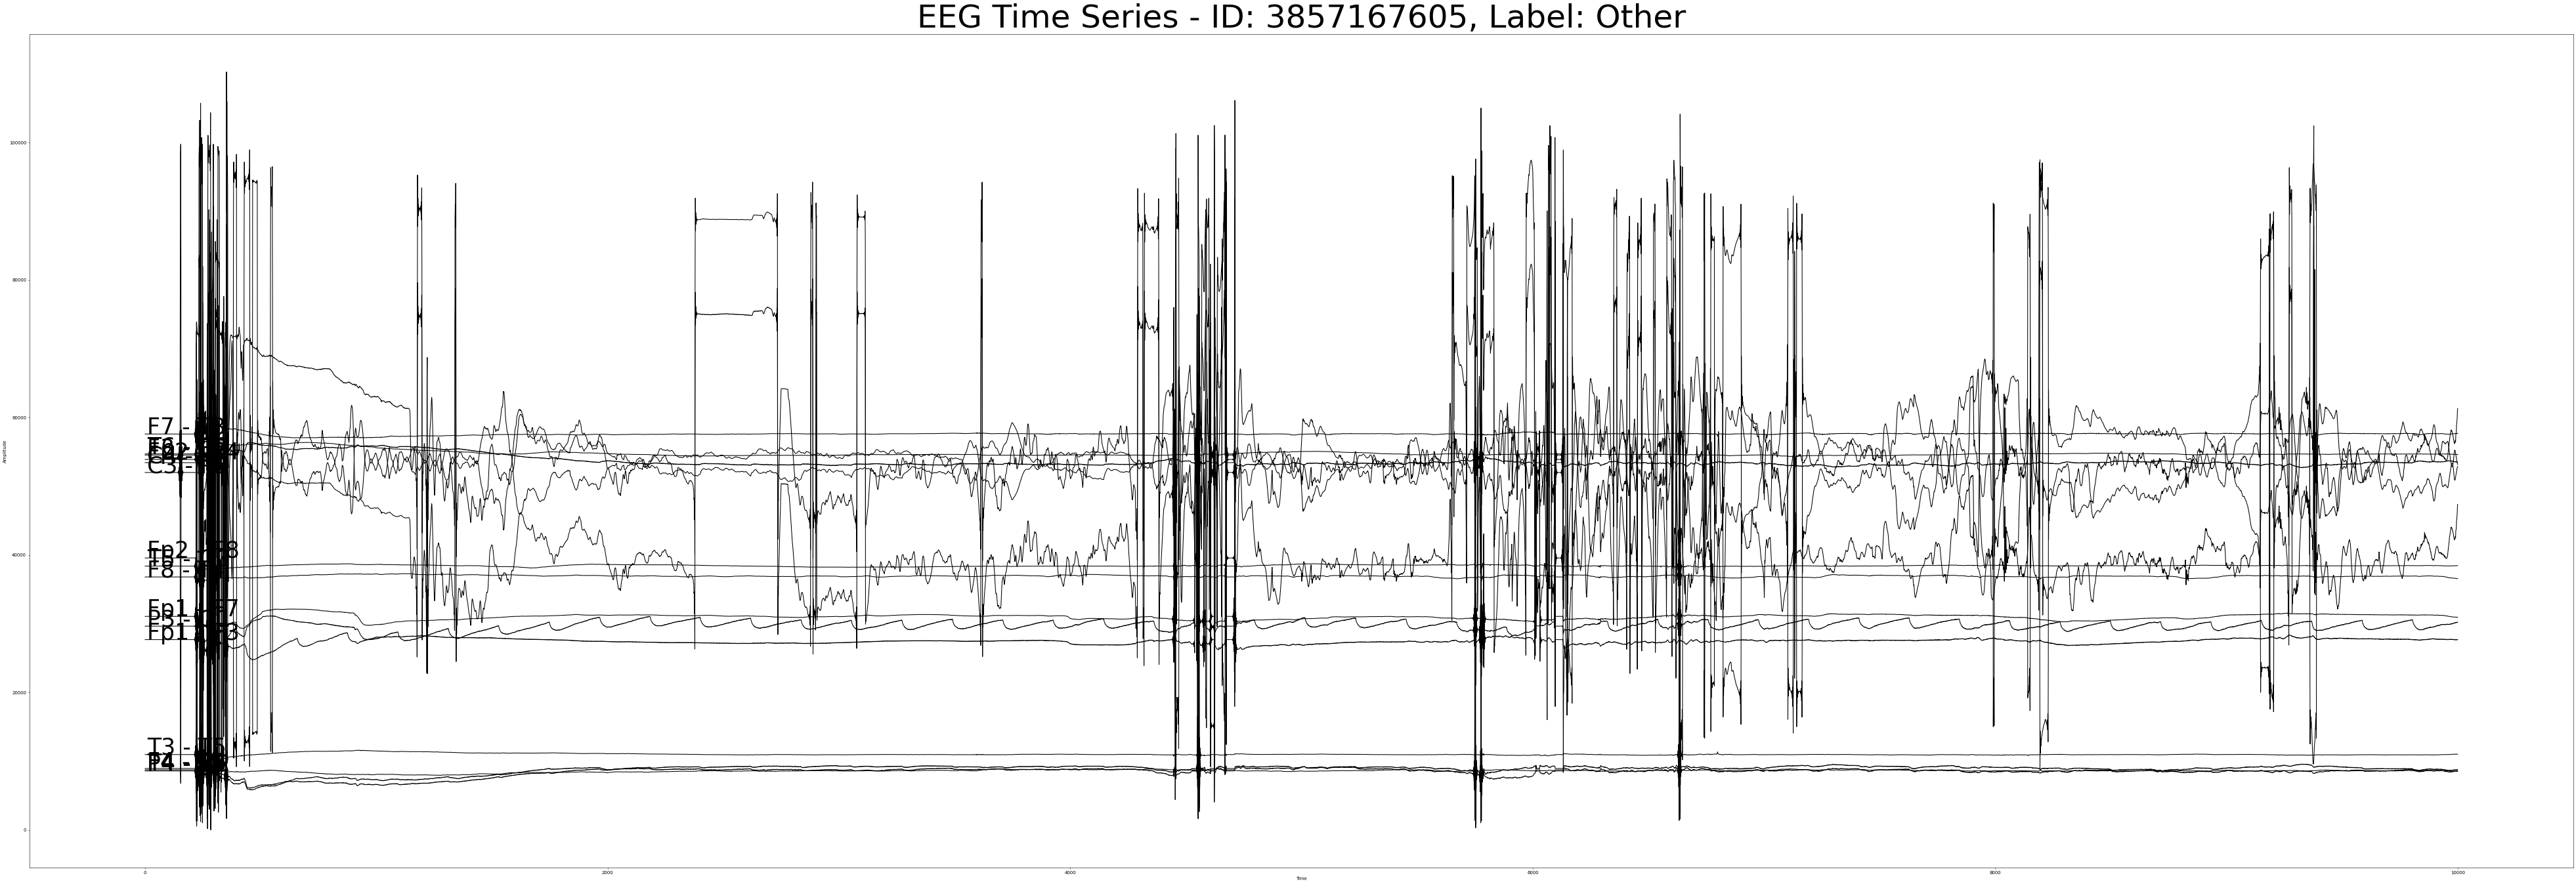

Columns: ['P4 - O2', 'C4 - P4', 'F4 - C4', 'Fp2 - F4', 'T6 - O2', 'T4 - T6', 'F8 - T4', 'Fp2 - F8', 'P3 - O1', 'C3 - P3', 'F3 - C3', 'Fp1 - F3', 'T5 - O1', 'T3 - T5', 'F7 - T3', 'Fp1 - F7']


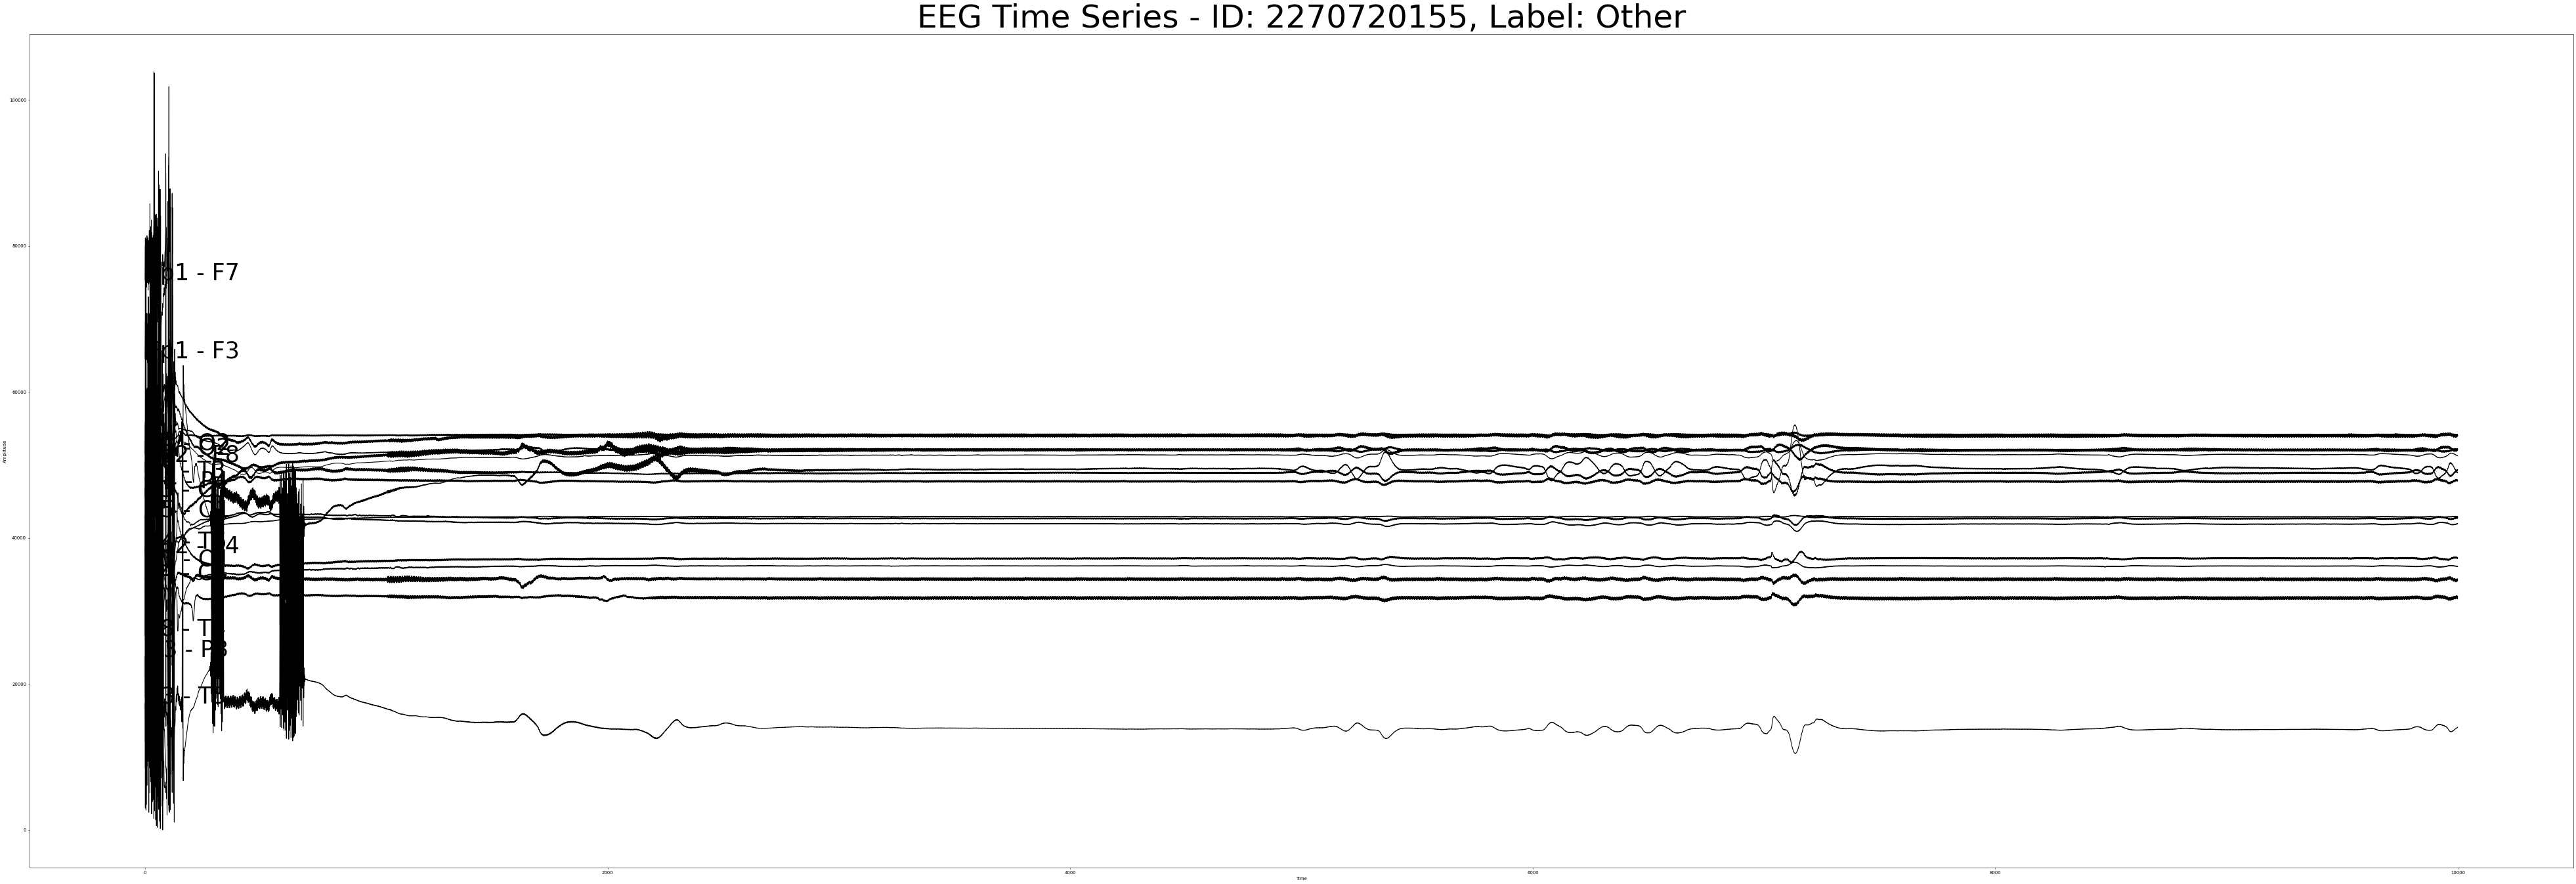

Columns: ['P4 - O2', 'C4 - P4', 'F4 - C4', 'Fp2 - F4', 'T6 - O2', 'T4 - T6', 'F8 - T4', 'Fp2 - F8', 'P3 - O1', 'C3 - P3', 'F3 - C3', 'Fp1 - F3', 'T5 - O1', 'T3 - T5', 'F7 - T3', 'Fp1 - F7']


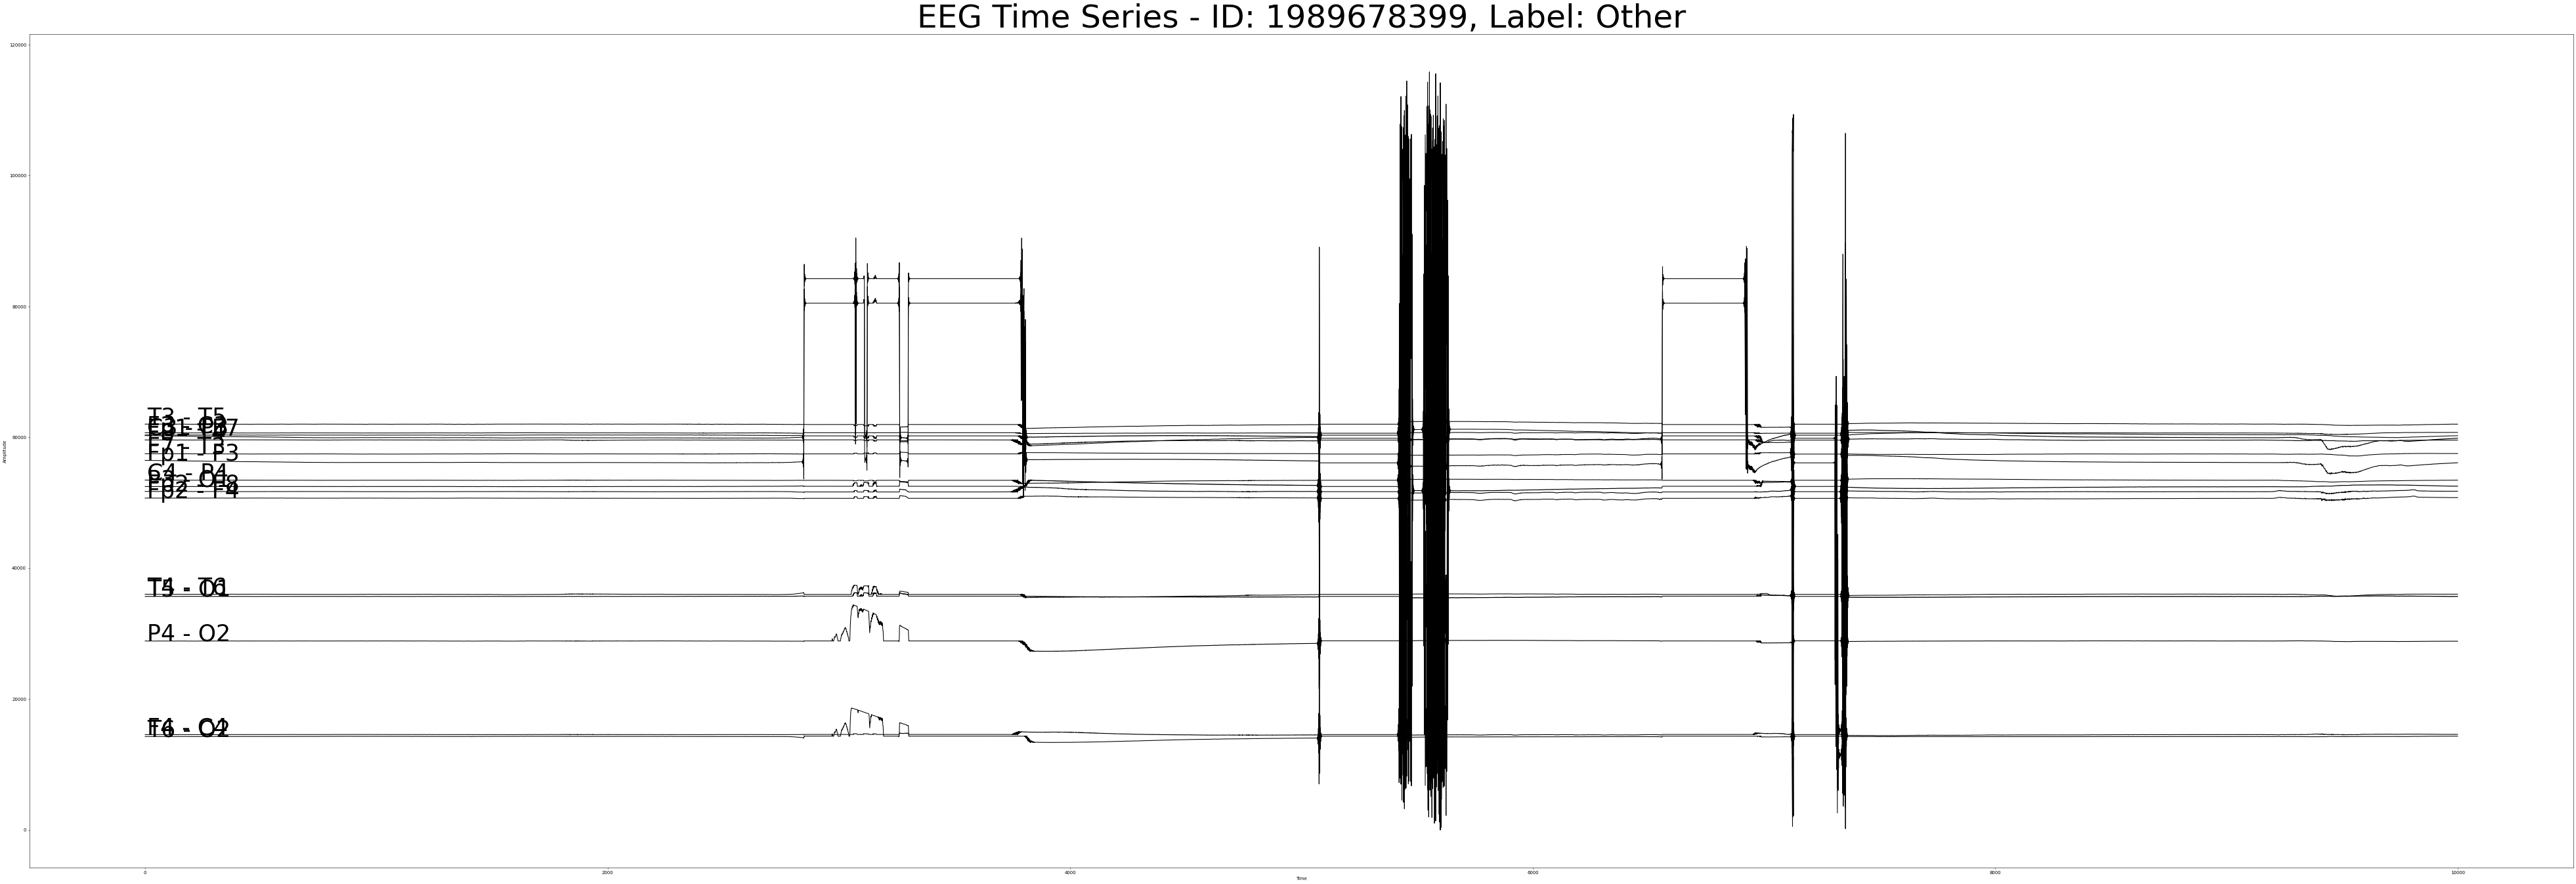

Columns: ['P4 - O2', 'C4 - P4', 'F4 - C4', 'Fp2 - F4', 'T6 - O2', 'T4 - T6', 'F8 - T4', 'Fp2 - F8', 'P3 - O1', 'C3 - P3', 'F3 - C3', 'Fp1 - F3', 'T5 - O1', 'T3 - T5', 'F7 - T3', 'Fp1 - F7']


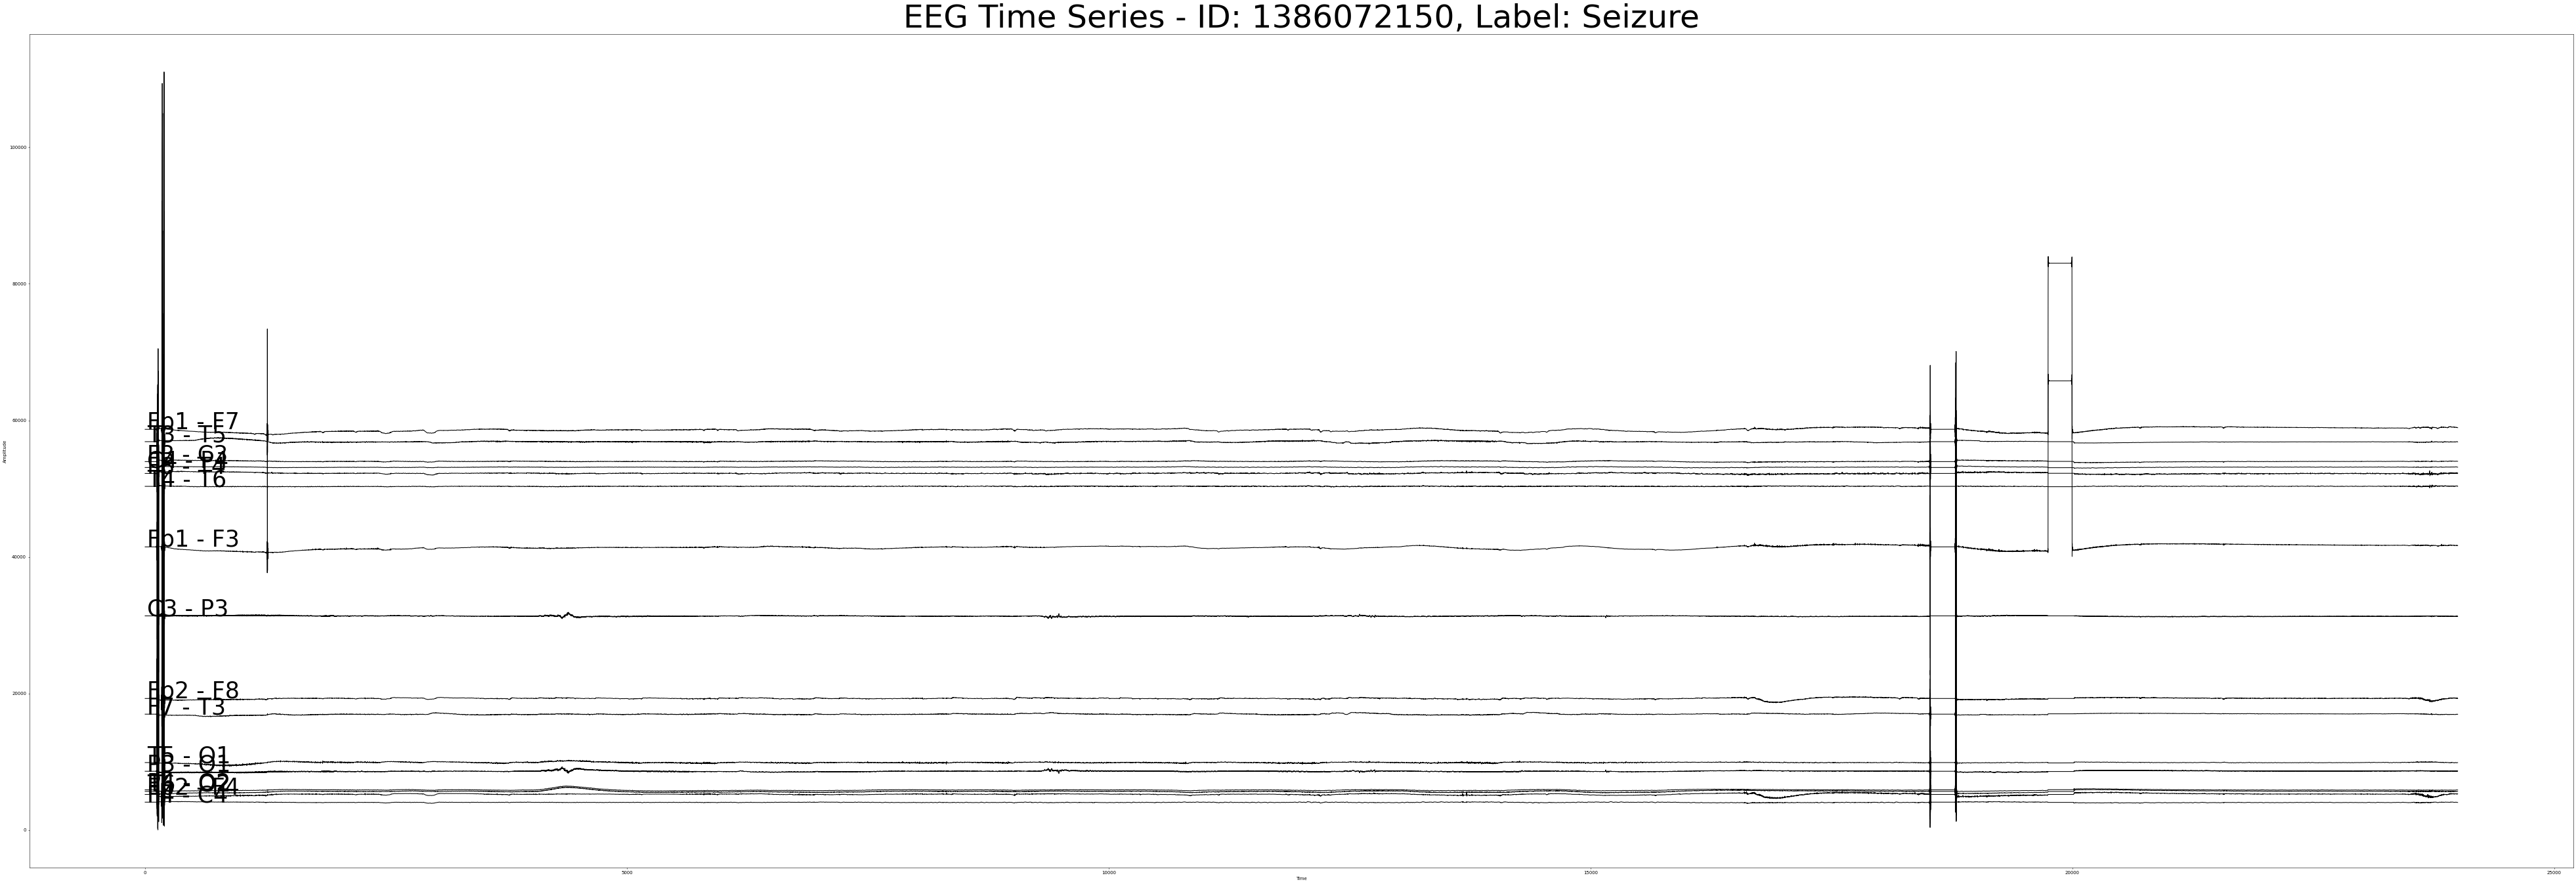

Columns: ['P4 - O2', 'C4 - P4', 'F4 - C4', 'Fp2 - F4', 'T6 - O2', 'T4 - T6', 'F8 - T4', 'Fp2 - F8', 'P3 - O1', 'C3 - P3', 'F3 - C3', 'Fp1 - F3', 'T5 - O1', 'T3 - T5', 'F7 - T3', 'Fp1 - F7']


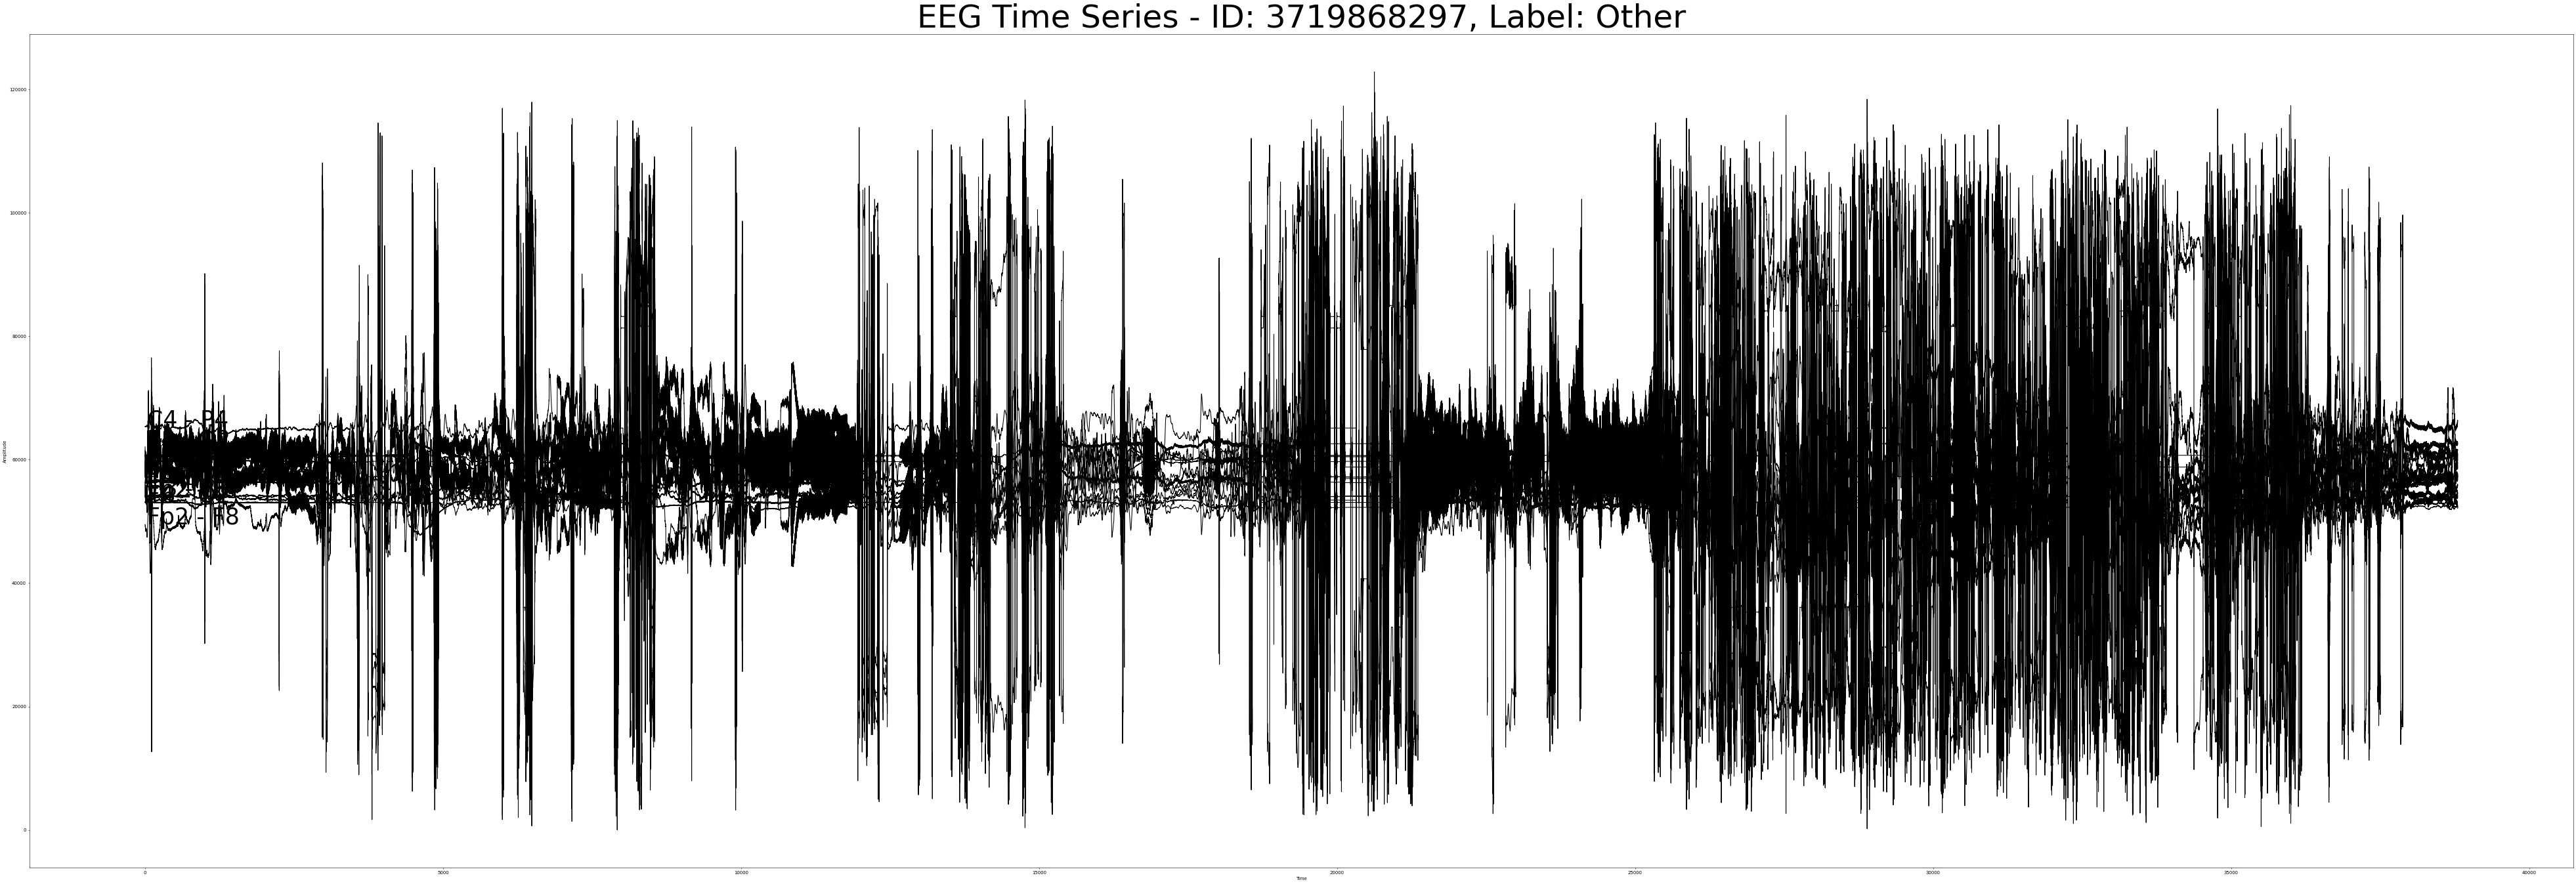

In [ ]:
for eeg_file_id, consensus_label in zip(selected_eeg_ids, selected_consensuses):
    # eeg_file_id = ...
    # print(f"eeg_file_id = {eeg_file_id}") # eeg_file_id = 722738444 ('LRDA')

    matching_spectrogram_file_id = train_csv.loc[train_csv['eeg_id'] == eeg_file_id, 'spectrogram_id'].values[0]

    train_eeg_sample = os.path.join(project_dir, f'train_eegs/{eeg_file_id}.parquet')
    train_spectrogram_sample = os.path.join(project_dir, f'train_spectrograms/{matching_spectrogram_file_id}.parquet')

    ## 1. get eeg_df and spectrogram_df (corresponding ids from train.csv)
    eeg_df = pd.read_parquet(train_eeg_sample, engine='pyarrow')
    spectrogram_df = pd.read_parquet(train_spectrogram_sample, engine='pyarrow')

    referenced_eeg_df = apply_referencing(eeg_df, mode='bdb_montage')
    # 2. Draw!
    plot_eeg_stacks(referenced_eeg_df, eeg_file_id, consensus_label, mode='bdb_montage') 

In [ ]:
## see amplitude variation. 


### Deotte's Magic Formula 

(https://www.kaggle.com/competitions/hms-harmful-brain-activity-classification/discussion/469760)


LL Spec = ( spec(Fp1 - F7) + spec(F7 - T3) + spec(T3 - T5) + spec(T5 - O1) )/4

LP Spec = ( spec(Fp1 - F3) + spec(F3 - C3) + spec(C3 - P3) + spec(P3 - O1) )/4

RP Spec = ( spec(Fp2 - F4) + spec(F4 - C4) + spec(C4 - P4) + spec(P4 - O2) )/4

RL Spec = ( spec(Fp2 - F8) + spec(F8 - T4) + spec(T4 - T6) + spec(T6 - O2) )/4


In [ ]:

# get one column of eeg signal
def get_segment_eeg(eeg, offset, length_in_sec, srate=200):

    # selects corresponding rows. 
    eeg_segment = eeg.iloc[offset*srate:(offset + length_in_sec)*srate]
    return eeg_segment

# # from generated spectrogram
# def get_segment_spec(offset, length_in_sec, srate=200):

# from Kaggle spectrogram!
def get_segment_spec_kaggle(spec, offset, length_in_sec, srate=200):

    # selects corresponding rows. 
    spec_segment = spec.loc[ (spec.time >= offset) & (spec.time < offset+600) ]
    return spec_segment


In [ ]:
## aggregate spectrogram

# internally calls get_spectrogram_from_eeg(eeg)
# this function doesn't plot! ('s job)
def get_aggregated_spectrogram(eeg_df, mode='magic'):

    # electrode_name = 'T3'
    # eeg = eeg_df[electrode_name]  # Single-channel!
    # print(f"eeg.shape = {eeg.shape}")
    # f, t, Sxx = get_spectrogram_from_eeg(eeg)

    electrodes = {
        'LL': ['Fp1', 'F7', 'T3', 'T5', 'O1'],
        'LP': ['Fp1', 'F3', 'C3', 'P3', 'O1'],
        'RP': ['Fp2', 'F8', 'T4', 'T6', 'O2'],
        'RR': ['Fp2', 'F4', 'C4', 'P4', 'O2']
    }

    # three levels. eeg-level subtraction, getting spectrogram, avg-ing spectrogram. 
    # also possibly we could DRAW spectrograms and then avg? (doesn't sounds like a great idea though)

    # if mode == 'magic':
    #     for chain, electrodes_list in electrodes.items():
    #         for i in range(len(electrodes_list) - 1):
    #             diff_col_name = f"{electrodes_list[i]} - {electrodes_list[i+1]}"
    #             res_df[diff_col_name] = eeg_df[electrodes_list[i]] - eeg_df[electrodes_list[i+1]]


    # -- # -- # -- # -- # -- # -- # -- # -- # -- # -- # -- # -- # -- # -- # -- # -- # -- # -- 
    
    # 0. Handle NaNs
    eeg_df = handle_nans(eeg_df)
    # 1. Apply Referencing 
    referenced_eeg_df = apply_referencing(eeg_df, mode='bdb_montage')

    print(f"num cols in referenced_eeg_df = {referenced_eeg_df.shape[1]}") # should be 16

    res_df = pd.DataFrame()
    for chain, electrodes_list in electrodes.items():
        res_df[f"{chain}_spec"] = 0 # None # = np.nan
        for i in range(len(electrodes_list) - 1):
            diff_col_name = f"{electrodes_list[i]} - {electrodes_list[i+1]}"
            res_df[f"{chain}_spec"] += get_spectrogram_from_eeg(referenced_eeg_df[diff_col_name])

        res_df[f"{chain}_spec"] /= 4


    return res_df




In [ ]:


# ## EEG

# # 0. Handle NaNs
# eeg_df = handle_nans(eeg_df)
# # 1. Apply Referencing 
# referenced_eeg_df = apply_referencing(eeg_df, mode='bdb_montage')
# # 2. Draw!
# plot_eeg_stacks(referenced_eeg_df, eeg_file_id, eeg_df_label, mode='bdb_montage') 

# # Option a. Apply Filter
# # EEG signals referenced and low-pass filtered
# low_filtered_eeg_df = apply_filter(eeg_df, cutoff_freq=5, srate=200, filter_type='low')
# referenced_n_filtered_eeg_df = apply_referencing(low_filtered_eeg_df, mode='bdb_montage') # global_avg
# plot_eeg_stacks(referenced_n_filtered_eeg_df, eeg_file_id, eeg_df_label, mode='bdb_montage') #

# # Option b. Only show middle chunks - 10 secs or 50 secs -> refer get_eeg_spectrogram_pair() in eda_utils.py




# ## Spectrogram From EEG -> i have not yet implemented chaining for spectrograms!

# # hmm k i still need to implement formula funcion, one of them being Deotte's "magic formula"
# # https://www.kaggle.com/competitions/hms-harmful-brain-activity-classification/discussion/469760

# # well for now let's review drawing single-channel spectrograms. 

# electrode_name = 'T3'
# eeg = eeg_df[electrode_name]  # Single-channel!
# print(f"eeg.shape = {eeg.shape}")
# f, t, Sxx = get_spectrogram_from_eeg(eeg)

# # def plot_spectrogram_from_eeg(f, t, spectrogram, electrodes, eeg_file_id, convert_to_db=True, figsize=(10, 6), fix_colorbar_range=True, cmap='jet'):
# plot_spectrogram_from_eeg(f, t, Sxx, electrode_name, eeg_file_id)



# ## Kaggle Spectrograms

# # 1. Partition spectrogram_df into 4 chains. 

# prefixes = set(column[:2] for column in spectrogram_df.columns)
# print(prefixes)

# chains4spec = prefixes - {'ti'}
# chains4spec = list(chains4spec)

# partitioned_dfs = {}

# for chain in chains4spec:
#     # Filter columns that start with the current chain
#     filtered_columns = [col for col in spectrogram_df.columns if col.startswith(chain)]
    
#     # Create a new DataFrame with these columns
#     partitioned_dfs[chain] = spectrogram_df[filtered_columns] # dictionary of dfs

# # Now, partitioned_dfs['RL'], partitioned_dfs['ti'], etc., are your separate DataFrames
    
# for chain_name, sub_df in partitioned_dfs.items():
#     # print(sub_df)
#     # print(chain_name)
#     display(sub_df.head(3))

# # 2. Draw!
    

# plot_spectrogram_parquet(partitioned_dfs, convert_to_db=True, fix_colorbar_range=True)
# plot_spectrogram_parquet(partitioned_dfs, convert_to_db=False, fix_colorbar_range=False)